In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dfh=pd.read_csv("https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv")

In [3]:
dfh.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
dfh=dfh[(dfh['ocean_proximity']=='<1H OCEAN') | (dfh['ocean_proximity']=='INLAND')]

In [5]:
dfh

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0,<1H OCEAN
830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0,<1H OCEAN
859,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN
861,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [6]:
dfh.shape

(15687, 10)

In [7]:
dfh.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [8]:
dfh=dfh.fillna(0)

In [9]:
dfh.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [10]:
dfh.reset_index(drop=True)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0,<1H OCEAN
1,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0,<1H OCEAN
2,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0,<1H OCEAN
3,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN
4,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
15682,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
15683,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
15684,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
15685,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [11]:
import sklearn

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
dfh.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,15687.000000,15687.000000,15687.000000,15687.000000,15687.000000,15687.000000,15687.000000,15687.000000,15687.000000
mean,-119.217442,35.467307,27.188118,2665.677312,535.827755,1466.317205,500.916491,3.804019,191943.020017
std,1.780380,2.066387,12.057128,2257.672743,436.799797,1180.389908,392.759399,1.857158,108801.077620
min,-124.140000,32.610000,1.000000,2.000000,0.000000,3.000000,2.000000,0.499900,14999.000000
25%,-121.070000,33.940000,17.000000,1441.000000,291.000000,802.000000,278.000000,2.520800,111300.000000
50%,-118.370000,34.160000,27.000000,2118.000000,429.000000,1195.000000,406.000000,3.468800,166900.000000
75%,-117.990000,37.340000,36.000000,3172.000000,642.000000,1777.000000,602.000000,4.686200,241100.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [14]:
df_full_train,df_test=train_test_split(dfh,test_size=0.2,random_state=1)
df_train,df_val=train_test_split(df_full_train,test_size=0.25,random_state=1)

In [15]:
len(df_train),len(df_val),len(df_test)

(9411, 3138, 3138)

In [16]:
df_train=df_train.reset_index(drop=True)
df_val=df_val.reset_index(drop=True)
df_test=df_test.reset_index(drop=True)

In [17]:
y_train=np.log1p(df_train['median_house_value'].values)
y_val=np.log1p(df_val['median_house_value'].values)
y_test=np.log1p(df_test['median_house_value'].values)

In [18]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [19]:
df_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-120.25,37.93,13.0,493.0,76.0,196.0,68.0,3.3750,INLAND
1,-118.40,34.00,10.0,1526.0,339.0,705.0,268.0,5.8083,<1H OCEAN
2,-121.67,38.85,46.0,645.0,131.0,410.0,122.0,1.7417,INLAND
3,-118.14,33.88,24.0,3305.0,982.0,2085.0,881.0,2.6641,<1H OCEAN
4,-118.11,33.92,34.0,1414.0,263.0,983.0,264.0,4.1767,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
9406,-118.00,34.12,37.0,1340.0,325.0,928.0,333.0,3.9219,INLAND
9407,-118.10,34.10,34.0,2578.0,645.0,1628.0,617.0,2.3400,<1H OCEAN
9408,-117.45,34.01,26.0,3042.0,598.0,1720.0,551.0,2.7600,INLAND
9409,-117.94,34.03,35.0,1375.0,249.0,1015.0,239.0,4.0521,<1H OCEAN


In [20]:
from sklearn.feature_extraction import DictVectorizer

In [21]:
dv=DictVectorizer(sparse=True)

In [22]:
train_dict=df_train.to_dict(orient='records')

In [23]:
X_train=dv.fit_transform(train_dict)

In [24]:
X_train

<9411x10 sparse matrix of type '<class 'numpy.float64'>'
	with 84699 stored elements in Compressed Sparse Row format>

In [25]:
from sklearn.tree import DecisionTreeRegressor

In [26]:
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)

DecisionTreeRegressor()

In [27]:
dtrr=DecisionTreeRegressor(max_depth=1)
dtrr.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=1)

In [28]:
from sklearn.ensemble import RandomForestRegressor

In [29]:
rfr=RandomForestRegressor(n_estimators=10,random_state=1,n_jobs=-1)

In [30]:
rfr.fit(X_train,y_train)

RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=1)

In [31]:
val_dict=df_val.to_dict(orient='records')

In [32]:
X_val=dv.transform(val_dict)

In [33]:
y_pred=rfr.predict(X_val)

In [34]:
from sklearn import metrics

In [35]:
print("mean squared error",metrics.mean_squared_error(y_val,y_pred))
print("Root mean squared error",np.sqrt(metrics.mean_squared_error(y_val,y_pred)))

mean squared error 0.060161005226413156
Root mean squared error 0.24527740463893766


In [36]:
#0.245

In [37]:
n_estimator_range=np.arange(10,201,10)

In [38]:
n_estimator_range

array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200])

In [39]:
scoress=[]

for e in n_estimator_range:
    rfrr=RandomForestRegressor(n_estimators=e,random_state=1,n_jobs=-1)
    rfrr.fit(X_train,y_train)
    y_predd=rfrr.predict(X_val)
    rmsee=np.sqrt(metrics.mean_squared_error(y_val,y_predd))
    
    scoress.append((e,rmsee))

In [40]:
columnss=['estimators','rmse']
dfscore=pd.DataFrame(scoress,columns=columnss)

In [41]:
dfscore

,estimators,rmse
0,10,0.245277
1,20,0.239041
2,30,0.236995
3,40,0.235509
4,50,0.235021
5,60,0.234584
6,70,0.234466
7,80,0.234721
8,90,0.234512
9,100,0.234308


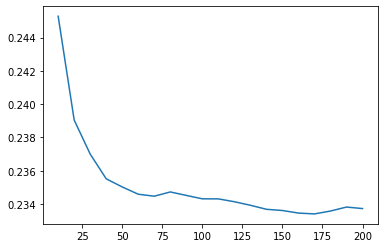

In [42]:
plt.plot(dfscore.estimators,dfscore.rmse)

In [43]:
# 160

In [ ]:
scoress=[]

for d in [10, 15, 20, 25]:
    for f in n_estimator_range:
        rfrd=RandomForestRegressor(n_estimators=f,max_depth=d,random_state=1,n_jobs=-1)
        rfrd.fit(X_train,y_train)
        y_prede=rfrr.predict(X_val)
        rmsed=np.sqrt(metrics.mean_squared_error(y_val,y_prede))
        scoress.append((f,d,rmsed))